# Import Libraries and Data

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV, calibration_curve

In [2]:
# Loading Dataset
raw_data = pd.read_csv("data_new.csv")
raw_data.head()

,Unnamed: 0,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,...,Mean WBC,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin
0,0,0,77,M,0,0,0,0,0,0,...,17.26,53.0,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04
1,1,1,42,M,1,0,0,0,0,0,...,10.60,17.0,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10
2,2,1,72,M,1,0,0,0,0,0,...,8.10,39.0,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23
3,9,1,72,M,1,0,0,0,1,1,...,6.90,13.0,11.0,12.00,0.9,0.7,0.80,10.6,10.6,10.60
4,13,0,76,M,0,0,0,0,0,0,...,18.20,55.0,42.0,48.50,2.6,1.8,2.20,12.5,12.5,12.50


# Data Preparation

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12489 entries, 0 to 12488
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             12489 non-null  int64  
 1   Hospital Mortality                     12489 non-null  int64  
 2   Age                                    12489 non-null  int64  
 3   Gender                                 12489 non-null  object 
 4   Uncomplicated Hypertension             12489 non-null  int64  
 5   Complicated Hypertension               12489 non-null  int64  
 6   Uncomplicated Diabetes                 12489 non-null  int64  
 7   Complicated Diabetes                   12489 non-null  int64  
 8   Malignancy                             12489 non-null  int64  
 9   Hematologic Disease                    12489 non-null  int64  
 10  Metastasis                             12489 non-null  int64  
 11  Pe

No missing values, all correct datatype, CHECK.

In [4]:
raw_data['Hospital Mortality'].value_counts()

0    10331
1     2158
Name: Hospital Mortality, dtype: int64

In [5]:
print(f"The data is unbalanced with {3017/(3017+15866)*100:.1f}% mortality rate.")

The data is unbalanced with 16.0% mortality rate.


In [6]:
# Convert Gender from Str to Numeric
raw_data['Gender'] = pd.get_dummies(raw_data['Gender'], drop_first = True)

In [7]:
raw_data.columns

Index(['Unnamed: 0', 'Hospital Mortality', 'Age', 'Gender',
       'Uncomplicated Hypertension', 'Complicated Hypertension',
       'Uncomplicated Diabetes', 'Complicated Diabetes', 'Malignancy',
       'Hematologic Disease', 'Metastasis', 'Peripheral Vascular Disease',
       'Hypothyroidism', 'Chronic Heart Failure', 'Stroke', 'Liver Disease',
       'SAPS II', 'SOFA', 'OASIS', 'Sepsis', 'Any Organ Failure',
       'Severe Respiratory Failure', 'Severe Coagulation Failure',
       'Severe Liver Failure', 'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Press

In [8]:
features = [
    'SAPS II', 'OASIS', 'Age', 'Gender',
    'Min Heart Rate', 'Mean Heart Rate', 'Mean MAP', 'Min Systolic Pressure',
    'Mean Systolic Pressure', 'Min Diastolic Pressure', 'Mean Diastolic Pressure', 'Max Temperature',
    'Mean Temperature', 'Max Lactate', 'Min Lactate', 'Min pH',
    'Mean pH', 'Min Glucose', 'Min BUN', 'Max Hemoglobin',
    'Min Hemoglobin', 'Uncomplicated Hypertension', 'Complicated Hypertension', 'Uncomplicated Diabetes',
    'Complicated Diabetes', 'Malignancy', 'Hematologic Disease', 'Peripheral Vascular Disease',
    'Hypothyroidism', 'Chronic Heart Failure', 'Liver Disease', 'Any Organ Failure',
    'Severe Respiratory Failure', 'Severe Cardiovascular Failure', 'Severe Central Nervous System Failure', 'Severe Renal Failure',
    'Respiratory Dysfunction', 'Renal Dysfunction', 'Metabolic Dysfunction', 'Neurologic Dysfunction'
    ]

In [9]:
X = raw_data[features]
y = raw_data['Hospital Mortality']

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
# Undersampling the training set
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

0    1508
1    1508
Name: Hospital Mortality, dtype: int64

In [12]:
#Undersampling the test set

In [13]:
rus = RandomUnderSampler(random_state=42)
X_test_rus, y_test_rus= rus.fit_resample(X_test, y_test)

y_test_rus.value_counts()

0    650
1    650
Name: Hospital Mortality, dtype: int64

# Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

## Untuned Model Performance

### Balanced Data - Undersampling technique

In [14]:
# Creating a Random Forest Model
rfc = RandomForestClassifier()

# Model Training
rfc_rus = rfc.fit(X_train_rus, y_train_rus)

# Get Prediction Values
y_pred_rus = rfc_rus.predict(X_test_rus)

print("Accuracy:",metrics.accuracy_score(y_test_rus, y_pred_rus))

Accuracy: 0.7853846153846153


Accuracy dropped from 0.87 => 0.77

## Grid Search

### Balanced Data

In [15]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [50, 100, 250, 500],
    "min_samples_split": range(2, 5),
    "min_samples_leaf": range(1, 4)
}

search_rus = GridSearchCV(rfc_rus, params, n_jobs = -1, cv = 10, verbose = 2)

search_rus.fit(X_train_rus, y_train_rus)

# GridSearchCV results
print("tuned hpyerparameters: (best parameters)", search_rus.best_params_)
print("accuracy :", search_rus.best_score_)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
tuned hpyerparameters: (best parameters) {'criterion': 'log_loss', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
accuracy : 0.7735748388374294


In [16]:
# In case I lose the grid search results above
# fit the best hyperparameter in the data
search_rus = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, min_samples_split = 3, min_samples_leaf = 3)
search_rus = search_rus.fit(X_train_rus, y_train_rus)

# Results from Best Models

In [17]:
y_prob = search_rus.predict_proba(X_test_rus)
y_prob_rus = search_rus.predict_proba(X_test_rus)

## 2. ROC Curves

In [18]:
# AUC score
rus_auc = roc_auc_score(y_test_rus, y_prob_rus[:,1])
print(f"For the best models: \nBalanced Data AUC = {rus_auc}")

For the best models: 
Balanced Data AUC = 0.8579076923076923


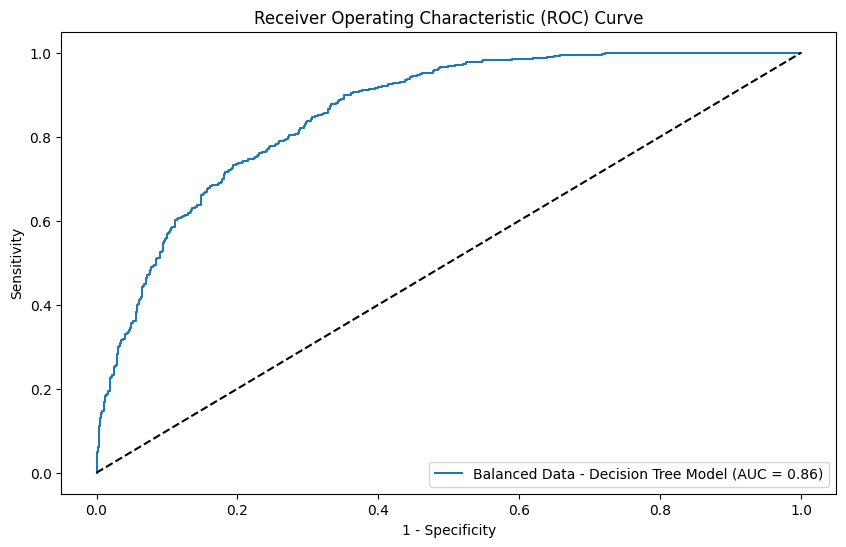

In [19]:
# fpr - false positive rate
# tpr - true positive rate
# threshold - part of the decision function used to calculate fpr and tpr

fpr_rus, tpr_rus, threshold_rus = roc_curve(y_test_rus, y_prob_rus[:,1])


plt.figure(figsize = (10, 6))

plt.plot(fpr_rus, tpr_rus, label = f'Balanced Data - Decision Tree Model (AUC = {rus_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

## 3. Classification Reports

In [20]:
y_pred_rus = search_rus.predict(X_test_rus)

In [21]:
print("Classification Report: Balanced Data & Uncalibrated")
print(classification_report(y_test_rus, y_pred_rus, target_names = ['Survival', 'Death']))

Classification Report: Balanced Data & Uncalibrated
              precision    recall  f1-score   support

    Survival       0.77      0.75      0.76       650
       Death       0.76      0.78      0.77       650

    accuracy                           0.76      1300
   macro avg       0.76      0.76      0.76      1300
weighted avg       0.76      0.76      0.76      1300



## 4. Importance Graphs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


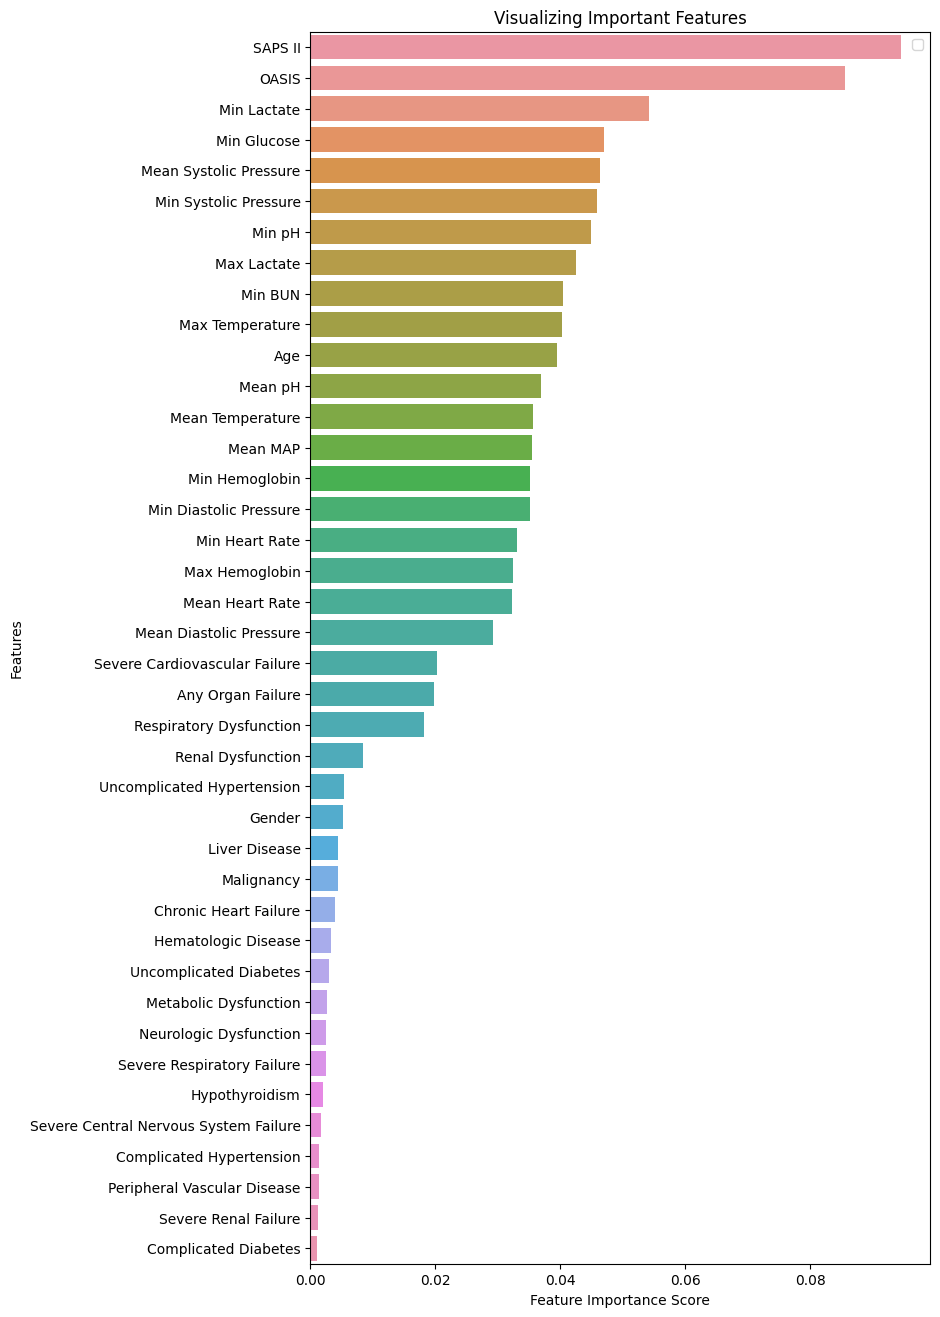

In [22]:
feature_imp = pd.Series(search_rus.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

plt.figure(figsize = (8, 16))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()